## Этап 1. Знакомство с данными

### 1.1 Импортирование библиотек

Импортируем необходимые библиотеки для нашей работы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
pd.options.display.float_format = '{:,.2f}'.format

### 1.2 Чтение файлов и знакомство с данными

Прочитаем предоставленные датасеты.

In [2]:
calls = pd.read_csv('/datasets/calls.csv') # информация о звонках
internet = pd.read_csv('/datasets/internet.csv') # информация об интернет-сессиях
messages = pd.read_csv('/datasets/messages.csv') # информация о сообщениях
tariffs = pd.read_csv('/datasets/tariffs.csv') # информация о тарифах
users = pd.read_csv('/datasets/users.csv') # информация о пользователях

Пройдемся более подробно по нашим датасетам.

#### 1.2.1 calls

Посмотрим на 10 случайных строк датасета calls.

In [3]:
calls.sample(10)

,id,call_date,duration,user_id
101577,1261_195,2018-11-22,3.95,1261
161608,1396_309,2018-08-24,1.91,1396
35930,1089_403,2018-11-04,19.19,1089
23418,1059_502,2018-08-19,19.38,1059
64916,1168_67,2018-10-22,0.00,1168
190179,1468_150,2018-07-23,13.28,1468
60292,1151_317,2018-12-10,11.82,1151
173549,1429_18,2018-09-23,2.33,1429
117164,1301_56,2018-10-24,0.51,1301
48036,1120_137,2018-10-21,7.45,1120


В нашем датасете встречаются такие столбцы как:
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Посмотрим нет ли аномальных значений в нашем датасете.

In [4]:
calls.describe()

,duration,user_id
count,"202,607.00","202,607.00"
mean,6.76,"1,253.94"
std,5.84,144.72
min,0.00,"1,000.00"
25%,1.30,"1,126.00"
50%,6.00,"1,260.00"
75%,10.70,"1,379.00"
max,38.00,"1,499.00"


Здесь в duration встречаются минимальное значение 0, это наши пропущенные звонки. Все в порядке, аномальных значений не выявлено.

Познакомимся с общей информацией.

In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Обратим внимание, что call_date представлен как object, в дальнейшемм необходимо будет заменить на datetime. Значение в duration нам нужны будут в дальнейшем с округлением в большую сторону, также после этого есть возможность изменить тип данных на целочисленные значения.

Проверим имееются ли явные дубликаты.

In [6]:
calls.duplicated().sum()

0

Явных дубликатов нет.

#### 1.2.2 internet


Посмотрим на 10 случайных строк датасета internet.

In [7]:
internet.sample(10)

,Unnamed: 0,id,mb_used,session_date,user_id
12893,12893,1045_69,499.43,2018-05-09,1045
44299,44299,1153_2,203.59,2018-12-12,1153
99660,99660,1334_66,0.69,2018-11-16,1334
58716,58716,1197_351,586.88,2018-07-05,1197
57157,57157,1189_596,237.77,2018-09-04,1189
99423,99423,1332_397,266.21,2018-11-09,1332
127105,127105,1426_186,205.30,2018-11-10,1426
72015,72015,1243_232,581.05,2018-09-14,1243
42180,42180,1147_136,421.57,2018-11-02,1147
98769,98769,1331_293,753.11,2018-10-08,1331


Здесь встречаются такие столбцы:
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

Посмотрим встречаются ли аномальные значения.

In [8]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,"149,396.00","149,396.00","149,396.00"
mean,"74,697.50",370.19,"1,252.10"
std,"43,127.05",278.30,144.05
min,0.00,0.00,"1,000.00"
25%,"37,348.75",138.19,"1,130.00"
50%,"74,697.50",348.01,"1,251.00"
75%,"112,046.25",559.55,"1,380.00"
max,"149,395.00","1,724.83","1,499.00"


Здесь можно отметить опять же минимальное значение по трафику интернета,выраженное 0. Надо будет уточнить у менеджера, почему имеются такие значения, вполне возможно это простое включение интернета без его использования, либо использование ресурсов оператора не учитывает трафик, например личный кабинет, либо использование приложения оператора.

Познакомимся с общей информацией.

In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Здесь можно обратить внимание, что столбец Unnamed: 0 задвоился с индексом. mb_used в дальнейшем нужно будет округлить, и соответственно, сможем изменить тип данных на целые числа. session_date необходимо будет заменить на datetime.

Проверим на наличие явных дубликатов. 

In [10]:
internet.duplicated().sum()

0

Явных дубликатов нет.

#### 1.2.3 messages

Посмотрим на 10 первых строк датасета messages.

In [11]:
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Встречаются такие столбцы как:
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение    

Познакомимся с общей информацией.

In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В message_date потребуется изменить данных на datetime.

Проверим наличие явных дубликатов.

In [13]:
messages.duplicated().sum()

0

Явных дубликатов нет.

#### 1.2.4 tariffs

Познакомимся со строками из датасета tariffs.

In [14]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Здесь прелставлены наши два тарифа, имеющие такие столбцы как :
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Познакомимся с общей информацией.

In [15]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


#### 1.2.5 users

Посмотрим на 10 последних строк датасета users.

In [16]:
users.tail(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
490,1490,30,NaN,Москва,Радомир,Алесин,2018-04-03,smart
491,1491,56,NaN,Челябинск,Радислав,Андрейкин,2018-04-25,ultra
492,1492,63,NaN,Санкт-Петербург,Руслана,Артёменко,2018-06-26,smart
493,1493,71,NaN,Красноярск,Таисия,Ахматулина,2018-11-24,ultra
494,1494,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


Здесь можем встретить такие столбцы как:
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tarif — название тарифного плана

Посмотрим имеются ли аномальные значения в возрасте.

In [17]:
users.describe()

,user_id,age
count,500.00,500.00
mean,"1,249.50",46.59
std,144.48,16.67
min,"1,000.00",18.00
25%,"1,124.75",32.00
50%,"1,249.50",46.00
75%,"1,374.25",62.00
max,"1,499.00",75.00


Все в порядке, аномальных данных не наблюдаем.

Познакомимся с общей информацией.

In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В данном столбце можно заметить, что churn_date имеет пропущенные значения, это неспроста. Так как тарифом еще пользуются и нет даты закрытия тарифа данные значения остаются пропущенными. Также отметим, что reg_date и churn_date должен быть в datetime.

Проверим встречаются ли явные дубликаты.

In [19]:
users.duplicated().sum()

0

Явных дубликатов нет.

**Вывод**: Познакомившись с данными, мы отметим, что встречаются неверные типы данных в некоторых столбцах, где требуются тип данных, относящихся к дате, также некоторые столбцы требуют измнения типа данных на числовые значения. Также с датасете internet встречается дубляж индекса в столбце Unnamed: 0, необходимо будет избавиться от него. Все датасеты должны быть объединены в один для удобства. Сделаем это все в дальнейшем в предобработке данных. 

## Этап 2. Предобработка данных

### 2.1 Изменение типов данных

Изменим типы данных там, где есть необходимость в этом :

Для даты совершения звонка изменим тип данных на datetime.

In [20]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d') 

Нам необходимо округлить продолжительность звонков в большую сторону, а затем изменить тип данных на целочисленные значения. 

In [21]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

Для даты интернет-сессии изменим тиа данных на datetime.

In [22]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

Нам необходимо округлить интернет-трафик  в большую сторону, а затем изменить тип данных на целочисленные значения. 

In [23]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int')

Для даты сообщения изменим тип данных на datetime.

In [24]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

Аналогичную процедуру проведем и для даты подключения тарифа, а также даты прекращения использования тарифа.

In [25]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

### 2.2 Работа со столбцами

Нам необходимо избавиться от столбца Unnamed: 0	в internet, который задвоился с индексом.

In [26]:
del internet['Unnamed: 0']

Теперь добавим столбец месяц в необходимые датасеты:

Для звонков:

In [27]:
calls['month'] = calls['call_date'].dt.strftime('%m %B')


Для интернета:

In [28]:
internet['month'] = internet['session_date'].dt.strftime('%m %B')


Для сообщений:

In [29]:
messages['month'] = messages['message_date'].dt.strftime('%m %B')


### 2.3 Количество сделанных звонков и израсходованных минут разговора по месяцам

Для удобства и наглядности создадим сводную таблицу, по пользователям и месяцам. Здесь нам потребуется указать количество звонков и сумму по минутам.

In [30]:
user_calls_months = calls.pivot_table(index=['user_id','month'],values ='duration', aggfunc = ['count','sum'])

Переименуем наши столбцы.

In [31]:
user_calls_months.columns = ['calls_count','calls_duration_sum']

Посмотрим на созданную сводную таблицу.

In [32]:
user_calls_months

calls_count  calls_duration_sum
user_id month                                        
1000    05 May                 22                 159
        06 June                43                 172
        07 July                47                 340
        08 August              52                 408
        09 September           58                 466
...                           ...                 ...
1498    10 October             41                 247
1499    09 September            9                  70
        10 October             68                 449
        11 November            74                 612
        12 December            69                 492

[3174 rows x 2 columns]

### 2.4 Количество отправленных сообщений по месяцам

Создадим сводную таблицу для количества сообщений.

In [33]:
user_messages_months = messages.pivot_table(index = ['user_id','month'],values = 'id', aggfunc = 'count')

Переимениуем столбец.

In [34]:
user_messages_months.columns = ['messages_count']

Посмотрим на созданную таблицу.

In [35]:
user_messages_months

messages_count
user_id month                       
1000    05 May                    22
        06 June                   60
        07 July                   75
        08 August                 81
        09 September              57
...                              ...
1498    10 October                42
1499    09 September              11
        10 October                48
        11 November               59
        12 December               66

[2717 rows x 1 columns]

### 2.5 Объем израсходованного интернет-трафика по месяцам

Создадим сводную таблицу для использованного трафика по месяцам.

In [36]:
user_internet_month = internet.pivot_table(index = ['user_id','month'],values ='mb_used', aggfunc='sum')

Посмотрим на таблицу.

In [37]:
user_internet_month

mb_used
user_id month                
1000    05 May           2256
        06 June         23257
        07 July         14016
        08 August       14070
        09 September    14581
...                       ...
1498    10 October      20604
1499    09 September     1848
        10 October      17809
        11 November     17984
        12 December     13077

[3203 rows x 1 columns]

### 2.6 Объединенная таблица

Объединим наши сводные таблицу в одну общую.

In [38]:
user_used_month = user_calls_months.join([user_messages_months,user_internet_month], how = 'outer')

Также добавим столбцы из users в общую сводную таблицу.

In [39]:
user_used_month = user_used_month.join(users.loc[:, ['user_id','tariff','city','age','first_name','last_name','reg_date','churn_date']].set_index('user_id'), how = 'outer')

Посмотрим на результат.

In [40]:
user_used_month

calls_count  calls_duration_sum  messages_count  \
user_id month                                                           
1000    05 May              22.00              159.00           22.00   
        06 June             43.00              172.00           60.00   
        07 July             47.00              340.00           75.00   
        08 August           52.00              408.00           81.00   
        09 September        58.00              466.00           57.00   
...                           ...                 ...             ...   
1498    10 October          41.00              247.00           42.00   
1499    09 September         9.00               70.00           11.00   
        10 October          68.00              449.00           48.00   
        11 November         74.00              612.00           59.00   
        12 December         69.00              492.00           66.00   

                       mb_used tariff         city  age first_name  last_name  \
user_id month                                                                   
1000    05 May        2,256.00  ultra    Краснодар   52     Рафаил  Верещагин   
        06 June      23,257.00  ultra    Краснодар   52     Рафаил  Верещагин   
        07 July      14,016.00  ultra    Краснодар   52     Рафаил  Верещагин   
        08 August    14,070.00  ultra    Краснодар   52     Рафаил  Верещагин   
        09 September 14,581.00  ultra    Краснодар   52     Рафаил  Верещагин   
...                        ...    ...          ...  ...        ...        ...   
1498    10 October   20,604.00  smart  Владикавказ   68   Всеволод    Акимчин   
1499    09 September  1,848.00  smart        Пермь   35     Гектор   Корнилов   
        10 October   17,809.00  smart        Пермь   35     Гектор   Корнилов   
        11 November  17,984.00  smart        Пермь   35     Гектор   Корнилов   
        12 December  13,077.00  smart        Пермь   35     Гектор   Корнилов   

                       reg_date churn_date  
user_id month                               
1000    05 May       2018-05-25        NaT  
        06 June      2018-05-25        NaT  
        07 July      2018-05-25        NaT  
        08 August    2018-05-25        NaT  
        09 September 2018-05-25        NaT  
...                         ...        ...  
1498    10 October   2018-07-19 2018-10-25  
1499    09 September 2018-09-27        NaT  
        10 October   2018-09-27        NaT  
        11 November  2018-09-27        NaT  
        12 December  2018-09-27        NaT  

[3214 rows x 11 columns]

Получилась досаточно удобная таблица, которую с помощью query можно использовать как фильтр.

Как пример попробуем найти по имени Гектор. 

In [41]:
user_used_month.query('first_name == "Гектор"')

calls_count  calls_duration_sum  messages_count  \
user_id month                                                           
1071    01 January          24.00              194.00           16.00   
        02 February         54.00              401.00           19.00   
        03 March            42.00              283.00           15.00   
        04 April            36.00              321.00           16.00   
        05 May              52.00              365.00            8.00   
        06 June             46.00              313.00           23.00   
        07 July             36.00              281.00           17.00   
        08 August           39.00              229.00           19.00   
1370    02 February         25.00              227.00             nan   
        03 March            14.00               90.00             nan   
        04 April            24.00              159.00             nan   
        05 May              25.00              208.00             nan   
        06 June             28.00              174.00             nan   
        07 July             31.00              219.00             nan   
        08 August           17.00              123.00             nan   
        09 September        28.00              158.00             nan   
        10 October          16.00              108.00             nan   
1499    09 September         9.00               70.00           11.00   
        10 October          68.00              449.00           48.00   
        11 November         74.00              612.00           59.00   
        12 December         69.00              492.00           66.00   

                       mb_used tariff          city  age first_name last_name  \
user_id month                                                                   
1071    01 January   15,622.00  smart          Омск   20     Гектор   Чумаков   
        02 February  14,544.00  smart          Омск   20     Гектор   Чумаков   
        03 March     15,812.00  smart          Омск   20     Гектор   Чумаков   
        04 April     16,496.00  smart          Омск   20     Гектор   Чумаков   
        05 May       14,627.00  smart          Омск   20     Гектор   Чумаков   
        06 June      18,889.00  smart          Омск   20     Гектор   Чумаков   
        07 July      21,621.00  smart          Омск   20     Гектор   Чумаков   
        08 August    13,968.00  smart          Омск   20     Гектор   Чумаков   
1370    02 February  11,325.00  smart  Новороссийск   48     Гектор    Сысоев   
        03 March     23,268.00  smart  Новороссийск   48     Гектор    Сысоев   
        04 April     13,030.00  smart  Новороссийск   48     Гектор    Сысоев   
        05 May       13,605.00  smart  Новороссийск   48     Гектор    Сысоев   
        06 June      17,995.00  smart  Новороссийск   48     Гектор    Сысоев   
        07 July      16,681.00  smart  Новороссийск   48     Гектор    Сысоев   
        08 August    18,771.00  smart  Новороссийск   48     Гектор    Сысоев   
        09 September 14,800.00  smart  Новороссийск   48     Гектор    Сысоев   
        10 October   13,923.00  smart  Новороссийск   48     Гектор    Сысоев   
1499    09 September  1,848.00  smart         Пермь   35     Гектор  Корнилов   
        10 October   17,809.00  smart         Пермь   35     Гектор  Корнилов   
        11 November  17,984.00  smart         Пермь   35     Гектор  Корнилов   
        12 December  13,077.00  smart         Пермь   35     Гектор  Корнилов   

                       reg_date churn_date  
user_id month                               
1071    01 January   2018-01-09 2018-08-31  
        02 February  2018-01-09 2018-08-31  
        03 March     2018-01-09 2018-08-31  
        04 April     2018-01-09 2018-08-31  
        05 May       2018-01-09 2018-08-31  
        06 June      2018-01-09 2018-08-31  
        07 July      2018-01-09 2018-08-31  
        08 August    2018-01-09 2018-08-31  
1370    02 February  2018-02

Так как не все клиенты пользуются всеми возможностями тарифа проверим, встречаются ли пропущенные значения.

In [42]:
user_used_month.isnull().sum()

calls_count             40
calls_duration_sum      40
messages_count         497
mb_used                 11
tariff                   0
city                     0
age                      0
first_name               0
last_name                0
reg_date                 0
churn_date            3027
dtype: int64

Обратим внимание, что нужные нам строки, такие как длительность звонков, количество смс, и использование интернет-трафика имеют пустые значения., заменим их на 0, так как этим самым дадим понять, что абонент не использовал данные услуги в расчетном периоде.

In [43]:
user_used_month[['calls_duration_sum','messages_count', 'mb_used']] = user_used_month[['calls_duration_sum','messages_count', 'mb_used']].fillna(0)

In [44]:
user_used_month.isnull().sum()

calls_count             40
calls_duration_sum       0
messages_count           0
mb_used                  0
tariff                   0
city                     0
age                      0
first_name               0
last_name                0
reg_date                 0
churn_date            3027
dtype: int64

### 2.7 Помесячная выручка с каждого пользователя

Создадим функцию для определения смс сверх тарифа:

In [45]:
def over_sms(data):
    if data['tariff'] == 'smart':
        result = data['messages_count'] - 50
        if result > 0 :
            return result 
        else:
            return 0
    if data['tariff'] == 'ultra':
        result = data['messages_count'] - 1000
        if result > 0:
            return result
        else:
            return 0

Создадим функцию для определения минут сверх пакета:

In [51]:
def over_calls_duration_sum(data):
    if data['tariff'] == 'smart':
        result = data['calls_duration_sum'] - 500
        if result > 0 :
            return result 
        else:
            return 0
    if data['tariff'] == 'ultra':
        result = data['calls_duration_sum'] - 3000
        if result > 0:
            return result
        else:
            return 0

Так как трафик по условиям тарифа дан в mb, а нам нужны gb, переведем в них, так как так удобнее считать сверх тарифа. gb  = 1024 mb. Соответственно получается 15 gb для тарифа smart и 30 gb для тарифа ultra. Создадим функцию для определения интернет-трафика сверх тарифа:

In [52]:
def over_gb_used(data):
    if data['tariff'] == 'smart':
        result = data['mb_used'] / 1024 - 15
        if result > 0 :
            return result
        else:
            return 0
    if data['tariff'] == 'ultra':
        result = data['mb_used'] / 1024 - 30
        if result > 0:
            return result
        else:
            return 0

Функция для помесячной выручки с каждого польователя:

In [53]:
def total_rub(data):
    if data['tariff'] == 'smart':
        result = 550 + data['over_sms'] * 3 + data['over_calls_duration'] * 3 + data['over_gb_used'] * 200
        if result > 550 :
            return result
        else:
            return int(550)
    if data['tariff'] == 'ultra':
        result = 1950 + data['over_sms'] * 1 + data['over_calls_duration'] * 1 + data['over_gb_used'] * 150
        if result > 1950:
            return result
        else:
            return int(1950)

Применим функцию, чтоб определить смс сверх пакета.

In [54]:
user_used_month['over_sms'] = user_used_month.apply(over_sms, axis = 1).astype('int')

Применим функцию, чтоб определить минуты сверх пакета.

In [55]:
user_used_month['over_calls_duration'] = user_used_month.apply(over_calls_duration_sum, axis = 1)

Применим функцию, чтоб определить gb сверх пакета.

In [56]:
user_used_month['over_gb_used'] = user_used_month.apply(over_gb_used, axis = 1)

Округлим до gb сверх пакета до целых значений в большую сторону. 

In [57]:
user_used_month['over_gb_used'] = user_used_month['over_gb_used'].apply(np.ceil)

Применим функцию для помесячной выручки.

In [58]:
user_used_month['total_rub'] = user_used_month.apply(total_rub, axis = 1) 

Посмотрим на 10 строк нашей таблицы.

In [59]:
user_used_month.sample(10)

,,calls_count,calls_duration_sum,messages_count,mb_used,tariff,city,age,first_name,last_name,reg_date,churn_date,solo,over_sms,over_calls_duration,over_gb_used,total_rub
user_id,month,,,,,,,,,,,,,,,,
1185,06 June,102.00,844.00,0.00,"39,230.00",ultra,Санкт-Петербург,26,Мануэла,Родина,2018-04-13,NaT,"3,300.00",0,0.00,9.00,"3,300.00"
1153,10 October,43.00,329.00,0.00,"7,341.00",smart,Ульяновск,59,Евдокия,Одинцова,2018-10-18,NaT,550.00,0,0.00,0.00,550.00
1363,09 September,122.00,813.00,0.00,"17,152.00",ultra,Нижний Тагил,69,Оксана,Болдырева,2018-03-04,NaT,"1,950.00",0,0.00,0.00,"1,950.00"
1120,05 May,40.00,311.00,0.00,"17,143.00",ultra,Краснодар,25,Агнесса,Абдулина,2018-01-24,NaT,"1,950.00",0,0.00,0.00,"1,950.00"
1265,10 October,15.00,130.00,6.00,"2,246.00",ultra,Омск,24,Радим,Адамов,2018-06-24,2018-10-04,"1,950.00",0,0.00,0.00,"1,950.00"
1106,11 November,nan,0.00,29.00,"21,311.00",ultra,Калуга,67,Исаак,Костин,2018-04-26,NaT,"1,950.00",0,0.00,0.00,"1,950.00"
1419,11 November,62.00,456.00,52.00,"12,324.00",smart,Новороссийск,19,Эльмира,Яшина,2018-07-19,NaT,556.00,2,0.00,0.00,556.00
1147,07 July,33.00,247.00,26.00,"13,087.00",smart,Якутск,63,Владимир,Синицын,2018-07-09,NaT,550.00,0,0.00,0.00,550.00
1004,10 October,29.00,145.00,165.00,"18,494.00",ultra,Новокузнецк,68,Татьяна,Авдеенко,2018-05-14,NaT,"1,950.00",0,0.00,0.00,"1,950.00"


### 2.8 Вывод

* На данном этапе мы успешно изменили типы данных.
* Провели работу со сводной таблицой, привели в общий рабочий вид, теперь ее можно использовать как фильтр.
* Успешно определи по месяцам сколько тратит каждый клиент со своего пакета и сколько поверх.
* Посчитали помесячную выручку с каждого клиента.

## Этап 3. Аналитическая работа с данными

### 3.1 Общая таблица и анализ по тарифам

Создадим общую таблицу по тарифам, выразим в них среднюю, дисперсию, а также стандартное отклонение.

In [60]:
user_used_month.groupby('tariff')['calls_duration_sum','messages_count','mb_used'].agg(['mean','var','std'])

calls_duration_sum                   messages_count                 \
                     mean        var    std           mean      var   std   
tariff                                                                      
smart              417.93  36,219.32 190.31          33.38   796.81 28.23   
ultra              526.62 100,873.63 317.61          49.36 2,285.27 47.80   

         mb_used                           
            mean            var       std  
tariff                                     
smart  16,229.19  34,545,911.13  5,877.58  
ultra  19,486.90 101,935,621.05 10,096.32

Из данной таблицы можно подчеркнуть:
* В среднем по тарифу smart говорят 418 минут, в то время как для тарифа ultra среднее значение составляет 527 минут. В среднем для тарифа ultra остается практически половина минут из пакета. 
* В среднем по тарифу smart отправляют 34 сообщения, в то время как на тарифе ultra отправляют 50 сообщений, это говорит о том, что в среднем пакет смс используется лишь на 5%. 
* В тарифе smart пользователи расходуют в среднем 16 gb, в то время как на тарифе ultra 19.5 gb. Для тарифа smart этого недостаточно, для тарифа ultra в среднем остается еще 33 %. 
* Дисперсия и среднее отклонение больше на тарифе ultra, это говорит о большем размахе в наших значениях. 

### 3.2  Подробный анализ на основе графиков и данных

Нам потребуется создать гистограммы и описать распределения. Решено было построить гистограммы, а также боксплоты, чтобы имелось более полное описание данных.

Создадим функцию, для определения "усов" наших боксплотов:

In [62]:
def whiskers(df,column): # функция для опеределения "усов"
    stat = df[column].describe() # сохраним в переменную основные стат.показатели
    
    iqr = stat[6] - stat[4] # межквартирльный размах
    
    l_whisker = stat[4] - 1.5 * iqr # левый "ус" 
    r_whisker = stat[6] + 1.5 * iqr # правый "ус" 

    if l_whisker < stat[3]: l_whisker = stat[3]  # левый "ус" не меньше минимального значения
        
    if r_whisker > stat[7]: r_whisker = stat[7] # правый "ус" не больше максимального значения
        
    return [l_whisker, r_whisker]

Построим гистограммы и боксплоты, на основе визуализации и анализе данных сделаем выводы:

**По продожительности минут**

Построим гистограмму.

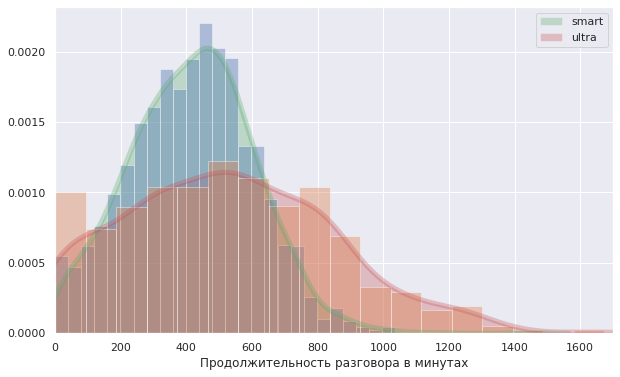

In [63]:
sns.set(style="darkgrid")
df = sns.load_dataset("iris")
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(user_used_month.query('tariff == "smart"')["calls_duration_sum"],
             kde=True,
             kde_kws={"color": "g", "alpha": 0.3, "linewidth": 5, "shade": True})
sns.distplot(user_used_month.query('tariff == "ultra"')["calls_duration_sum"],
             kde=True,
             kde_kws={"color": "r", "alpha": 0.3, "linewidth": 5, "shade": True})
plt.xlim(0,1700)
plt.xlabel('Продолжительность разговора в минутах')
plt.legend(['smart','ultra'])
plt.show()

Построим боксплот.

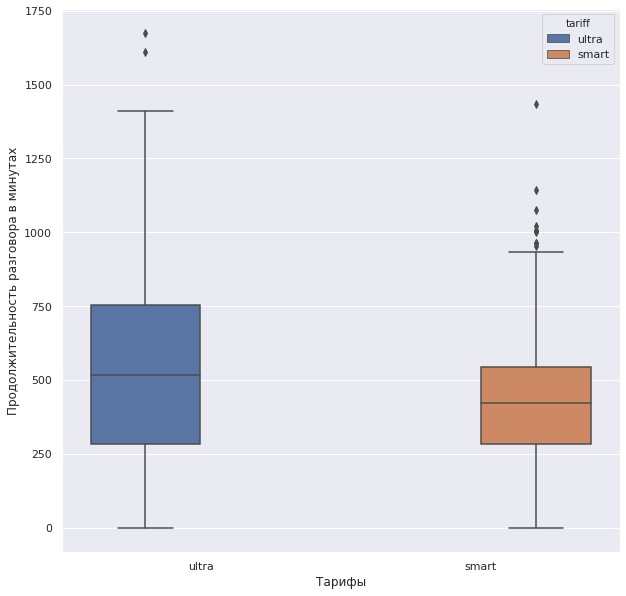

In [64]:
sns.set(style="darkgrid")
df = sns.load_dataset('iris')
sns.set(rc={'figure.figsize':(10,10)})
plt.legend(['smart','ultra'])
sns.boxplot(x='tariff', y='calls_duration_sum', data=user_used_month, hue="tariff")
plt.xlabel('Тарифы')
plt.ylabel('Продолжительность разговора в минутах')
plt.show()

Определим "усы" боксплота в тарифе ultra.

In [65]:
whiskers(user_used_month.query('tariff == "ultra"'),'calls_duration_sum')

[0.0, 1454.0]

Определим "усы" боксплота в тарифе smart.

In [66]:
whiskers(user_used_month.query('tariff == "smart"'),'calls_duration_sum')

[0.0, 939.5]

Посмотрим на квантили и другие статистические показатели.

In [67]:
user_used_month.groupby('tariff')['calls_duration_sum'].describe().T

tariff,smart,ultra
count,"2,229.00",985.00
mean,417.93,526.62
std,190.31,317.61
min,0.00,0.00
25%,282.00,284.00
50%,422.00,518.00
75%,545.00,752.00
max,"1,435.00","1,673.00"


На основе графиков и данных можно сделать вывод, что распределения близки к нормальному распределению. Медианое значение в тарифе смарт составляет 422 минуты, среднее 418 минут. Касаемо ультры медианое значение 518 минут, среднее 527 минут. Также обратим внимание, что что более 25% процентов smart используют минуты сверх пакета. Выбросов на тарифе smart больше. Значения выбросов для тарифа smart составляют от 940 минут, в то время как редкие значения у ultra от 1454 минут.

**По количеству отправленных сообщений**

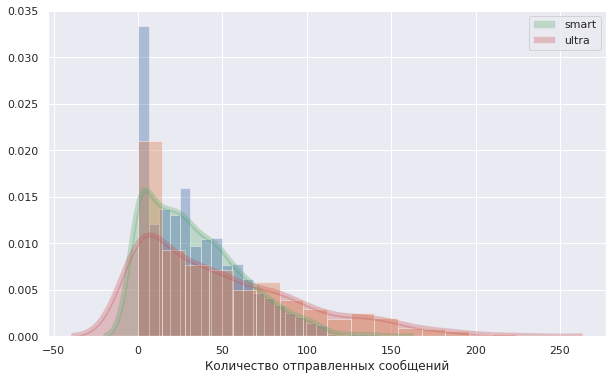

In [68]:
sns.set(style="darkgrid")
df = sns.load_dataset("iris")
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(user_used_month.query('tariff == "smart"')["messages_count"],
             kde=True,
             kde_kws={"color": "g", "alpha": 0.3, "linewidth": 5, "shade": True})
sns.distplot(user_used_month.query('tariff == "ultra"')["messages_count"],
             kde=True,
             kde_kws={"color": "r", "alpha": 0.3, "linewidth": 5, "shade": True})

plt.xlabel('Количество отправленных сообщений')
plt.legend(['smart','ultra'])
plt.show()

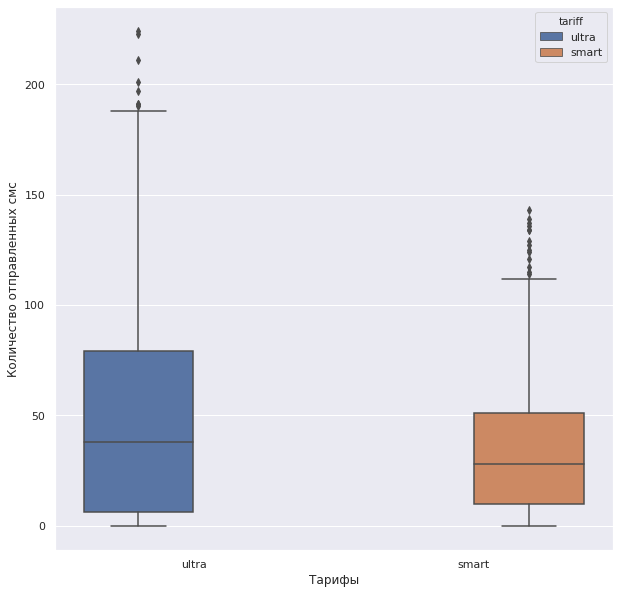

In [69]:
sns.set(style="darkgrid")
df = sns.load_dataset('iris')
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(x='tariff', y='messages_count', data=user_used_month, hue="tariff")
plt.xlabel('Тарифы')
plt.ylabel('Количество отправленных смс')
plt.show()

Определим "усы" боксплота в тарифе ultra.

In [70]:
whiskers(user_used_month.query('tariff == "ultra"'),'messages_count')

[0.0, 188.5]

Определим "усы" боксплота в тарифе smart.

In [71]:
whiskers(user_used_month.query('tariff == "smart"'),'messages_count')

[0.0, 112.5]

Посмотрим на квантили и другие статистические показатели.

In [72]:
user_used_month.groupby('tariff')['messages_count'].describe().T

tariff,smart,ultra
count,"2,229.00",985.00
mean,33.38,49.36
std,28.23,47.80
min,0.00,0.00
25%,10.00,6.00
50%,28.00,38.00
75%,51.00,79.00
max,143.00,224.00


На основе графиков и данных можно сделать вывод, что график смещен вправо. Смс не особо популярно. Медианое значение в тарифе смарт составляет 28 сообщений, среднее 34 сообщения. Касаемо ультры медианое значение 38 сообщений, среднее 50 сообщений. Также обратим внимание, что что более 25% процентов smart используют смс сверх пакета. Выбросов на тарифе smart больше. Значения выбросов для тарифа smart составляют от 113 сообщений, в то время как редкие значения у ultra от 189 сообщений.

**По использованию интернет-траффика**

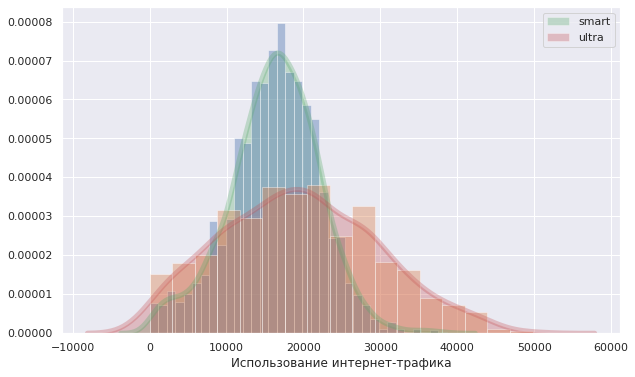

In [73]:
sns.set(style="darkgrid")
df = sns.load_dataset("iris")
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(user_used_month.query('tariff == "smart"')["mb_used"],
             kde=True,
             kde_kws={"color": "g", "alpha": 0.3, "linewidth": 5, "shade": True})
sns.distplot(user_used_month.query('tariff == "ultra"')["mb_used"],
             kde=True,
             kde_kws={"color": "r", "alpha": 0.3, "linewidth": 5, "shade": True})

plt.xlabel('Использование интернет-трафика')
plt.legend(['smart','ultra'])
plt.show()

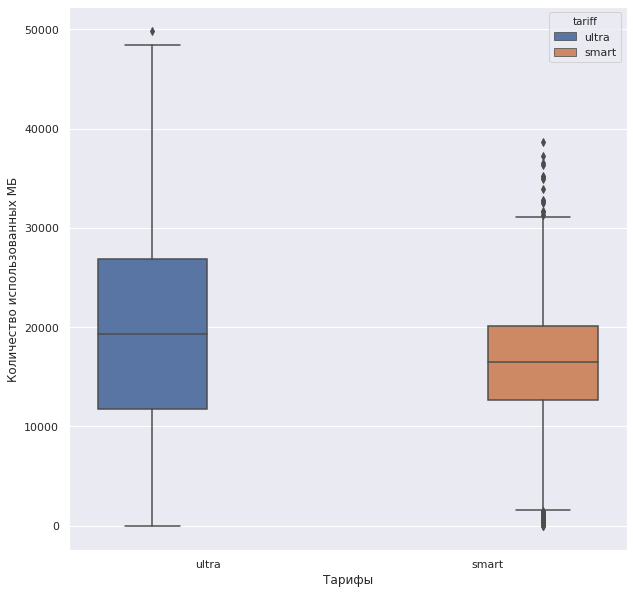

In [74]:
sns.set(style="darkgrid")
df = sns.load_dataset('iris')
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(x='tariff', y='mb_used', data=user_used_month, hue="tariff")
plt.xlabel('Тарифы')
plt.ylabel('Количество использованных МБ')
plt.show()

Определим "усы" боксплота в тарифе ultra.

In [75]:
whiskers(user_used_month.query('tariff == "ultra"'),'mb_used')

[0.0, 49480.0]

Определим "усы" боксплота в тарифе smart.

In [76]:
whiskers(user_used_month.query('tariff == "smart"'),'mb_used')

[1543.0, 31183.0]

Посмотрим на квантили и другие статистические показатели.

In [77]:
user_used_month.groupby('tariff')['mb_used'].describe().T

tariff,smart,ultra
count,"2,229.00",985.00
mean,"16,229.19","19,486.90"
std,"5,877.58","10,096.32"
min,0.00,0.00
25%,"12,658.00","11,785.00"
50%,"16,531.00","19,324.00"
75%,"20,068.00","26,863.00"
max,"38,610.00","49,789.00"


На основе графиков и данных можно сделать вывод, что графики блиpки к нормальному распределению. Интернетом пользуются активно. Медианое значение в тарифе смарт составляет 16.5 gb, среднее близко к медианому и составляет 16.3 gb. Касаемо ультры медианое значение 19.3gb , среднее также близко и составляет 19.5 gb. Также обратим внимание, что что более 50% процентов smart используют интернет сверх пакета. Выбросов на тарифе smart больше. Значения выбросов для тарифа smart составляют от 31 gb и ниже 1.5 gb, в то время как редкие значения у ultra от 49gb.

**Прибыль компании**

Посмотрим общую прибыль компании.

In [78]:
user_used_month['total_rub'].sum()

4925751.0

Теперь посмотрим прибыль по каждому из тарифов по отдельности.

In [79]:
user_used_month.groupby('tariff')['total_rub'].sum()

tariff
smart   2,885,751.00
ultra   2,040,000.00
Name: total_rub, dtype: float64

**Общий вывод**

Проанализиров графики и данные можно сделать вывод, что для пользователей тарифа ultra пакета предостаточно, редко когда абоненты используют услуги сверх пакета, и то это лишь интернет. Для smart картина противоположная, выше 25% абонентов используют сверх пакета, как смс так и продолжительность звонков, а интернет свыше 50%. В целом по количеству выбросов, можно понять, что тариф smart сильно ужат, и 25% процентов пользователей могли бы выбрать новый тариф. Общая прибыль составляет 4,925,751 руб, из них них 2,885,751 рублей по тарифу smart, 2,040,000 рублей по тарифу ultra. С уверенностью можно заявить, что можно внедрить новый тариф, промежуточный между smart и ultra, это в свое время поднимет лояльность клиента к компании, так как промежуточный тариф просто необходим, smarta мало, ultra избыточен, а психологический дискомфорт присуствует от ограничений пакета. 

## Этап 4. Проверка гипотез

Нам требуется проверить такие гипотезы как:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

### 4.1 Cредняя выручка пользователей тарифов «Ультра» и «Смарт»

Соотвтественно нулевой гипотезой будет являться, что средняя выручка в тарифе smart и ultra не различается. В то время как альтернативная , что средние выручки различаются.

Для этого нам потребуются две выборки, отдельно для каждого из тарифов:

In [80]:
smart  = user_used_month.query('tariff == "smart"')[['total_rub']]

In [81]:
ultra  = user_used_month.query('tariff == "ultra"')[['total_rub']]

Так как выборки у нас независимые , то воспользуемся критерием Стьюдента используя функцию ttest_ind из библиотеки scipy. Но для начала нужно избавиться от выбросов, так как как они влияют на критерий Стьюдента. Сделаем это с вышесозданной функцией whiskers, для определения нормальных значений.

Для тарифа smart:

In [82]:
whiskers(smart,'total_rub')

[550.0, 3550.0]

Для тарифа ultra:

In [83]:
whiskers(ultra,'total_rub')

[1950.0, 1950.0]

Зададим уровень альфа.

In [84]:
alpha = 0.05

Создадим переменную с результатом для сравнения.

In [85]:
results = st.ttest_ind(ultra.query('1950 <=total_rub<= 1950'), smart.query('550 <=total_rub<= 3550'))

Проверим наши гипотезы.

In [86]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [4.62445935e-153]
Отвергаем нулевую гипотезу


Как можно сделать вывод наша нулевая гипотеза отвергнута и средняя выручка по тарифам smart и ultra отличается.

Для наглядности также убедимся в данных таблицы.

In [87]:
user_used_month.query('(tariff=="smart" and 550 <=total_rub<= 3550) |(tariff=="ultra" and 1950 <=total_rub<= 1950)').pivot_table(index='tariff', values='total_rub', aggfunc='mean')

,total_rub
tariff,
smart,"1,249.74"
ultra,"1,950.00"


По таблице видно, что средние значения отличаются, и к тому же достаточно сильно. 

**Вывод**: Гипотеза отвергнута, средние значения для тарифов smart и ultra отличаются.

### 4.2 Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Соотвтественно нулевой гипотезой будет являться, что средняя выручка не различается в Москве и остальных населенных пунтках. В то время как альтернативная , что средние выручки различаются.

Для этого нам потребуются две выборки, одна выборка, включающая Москву, другая - остальные города:

In [88]:
moscow = user_used_month.query('city == "Москва"')[['total_rub']]

In [89]:
other = user_used_month.query('city != "Москва"')[['total_rub']]

Так как выборки у нас независимые , то воспользуемся критерием Стьюдента используя функцию ttest_ind из библиотеки scipy. Но для начала нужно избавиться от выбросов, так как как они влияют на критерий Стьюдента. Сделаем это с вышесозданной функцией whiskers, для определения нормальных значений.

In [90]:
whiskers(moscow,'total_rub')

[550.0, 3678.0]

In [91]:
whiskers(other,'total_rub')

[550.0, 3750.0]

Зададим уровень альфа.

In [92]:
alpha = 0.05

Создадим переменную с результатом для сравнения.

In [93]:
results = st.ttest_ind(moscow.query('550<=total_rub<=3678'), other.query('550<=total_rub<=3750'))

Проверим наши гипотезы.

In [94]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.27118564]
Не получилось отвергнуть нулевую гипотезу


Как можно сделать вывод наша нулевая гипотеза не отвергнута и средняя выручка по Москве и другим населенным пунктам схожи.

Также для наглядности убедимся в данных таблицы.

In [95]:
city = user_used_month
city.loc[city.loc[:,'city'] != 'Москва', 'city'] = 'Другой населенный пункт'
city.query('(city=="Москва" and 550 <=total_rub<= 3678) |(city=="Другой населенный пункт" and 550 <=total_rub<= 3750)').groupby('city')['total_rub'].agg(['mean'])


,mean
city,
Другой населенный пункт,"1,492.08"
Москва,"1,528.72"


**Вывод**: не удалось опровергнуть гипотезу, средние значения для тарифов Москвы и Других населенных пунктов в среднем схожи.

**Общий вывод:**  В ходе работы мы проверили две гипотезы, уровень альфа задали как 5%. Были заданы такие нулевые гипотезы как:
* Нулевая гипотеза заключается в том, что средняя выручка в тарифе smart и ultra не различается
* Нулевая гипотеза заключается в том, что средняя выручка по Москве и в других населенных пунктах не различается

Так как у нас независимые выборки, был выбран критерий Стьюдента, альтернативные гипотезы противоречат нулевым и в ходе работы по гипотезам было выявлено :
* Опровергли нулевую гипотезу. Средняя выручка по тарифам smart и ultra  с большой вероятностью различается и различается сильно.
* Нулевая гипотеза не отвергнута. Средняя выручка в Москве и других населенных пунктах с вероятностью схожи.

## Этап 5. Общий вывод

В ходе работы мы познакомились с 5 датасетами ,на их основе сделали анализ по тарифам компании "Мегалайн". Компания на рынке предоставила 2 тарифа. Мы проделали большой пласт работы, преобработали данные, изменив тип данных, создали сводную таблицу, на основе которой можно осуществлять полноценный поиск по клиенту, и смотреть все потребляемые им услуги по месяцам. Проанализировав мы смогли сделать следующие выводы:
* Тариф ultra предостаточен, клиенты данного тарифного планы редко когда выходят за рамки тарифного пакета.
* Тариф smart для 25% абонентов не достаточен в плане звонков и смс, и для более 50% в части интернета.
* Компании "Мегалайн" можно было бы внедрить новый тариф и повысить лояльность клиентов и избежать оттока абонентов. Тариф предлагает промежуточный вариант между тарифом smart и ultra. 
* Прибыль "Мегалайн" по тарифу smart составила 2,885,751 рублей.
* Прибыль "Мегалайн" по тарифу ultra составила 2,040,000 рублей.
* Опровергли нулевую гипотезу, касающуюся того, что средняя выручка по тарифам smart и ultra не различается.
* Не смогли опровергнуть гипотезу, касающуются того, что средняя выручка в Москве и других населенных пунктах не различается. Эта данность говорит о том, что в среднем Москва и другие населенные пункты приносят доход коммпании равномерно.

Исходя из проделанной работы было выявлено, что для компании и для клиентов, более успешным является тарифа ultra:
* Для компании потому как, при меньше количестве клиентов, данный тариф приносит большую выручку с каждого клиента.
* Для клиента, потому, как в целом, некоторые абоненты ужимают свои действия в использовании тарифа, так как его явно недостаточно, а цены сверх пакета, альтернатива не для каждого. В то время как абоненты тарифа ultra спокойно используют тариф, не ограничивая себя ни в чем.

Хочется еще раз подчеркнуть, исходя из того, что тариф smart имеет среднюю выручку 1250, и этого еще абоненты явно экономят, можно с уверенностью сказать, что прмежуточный тариф просто необходим. 